In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import scipy.integrate
import sklearn.discriminant_analysis
import sklearn.ensemble
import itertools
import sklearn.metrics
import scipy.cluster.hierarchy as shc
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
%matplotlib inline


In [2]:
# Carga datos
data = pd.read_csv('dengue.csv')
data = data[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']]
data=data.dropna()

De la grafica vemos que la linea horizontal divide el problem en 4 closuter, lo cual corresponde a menos grupos que los inicales y no distancia entre datos de un mismo grupo aproximada de 770


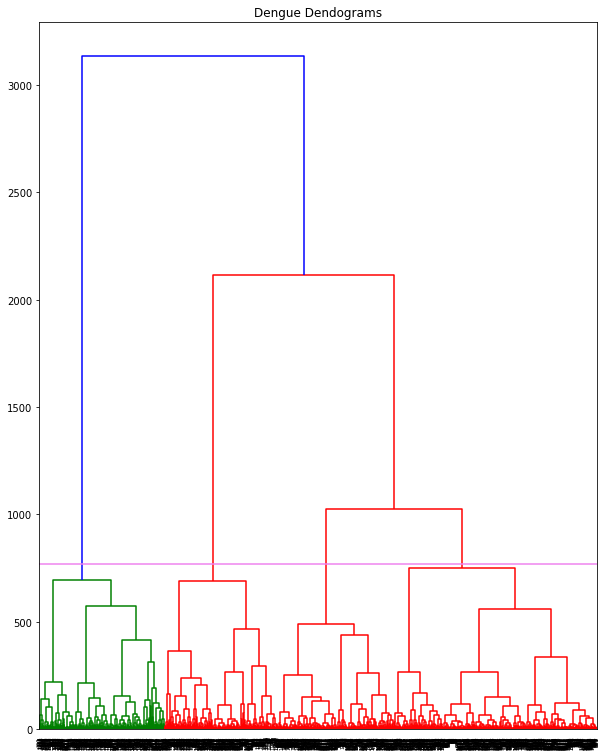

In [3]:
plt.figure(figsize=(10, 13))  
plt.title("Dengue Dendograms")  
plt.axhline(y=770, c='violet')
dend = shc.dendrogram(shc.linkage(data, method='ward')) 
print("De la grafica vemos que la linea horizontal divide el problem en 4 closuter, lo cual corresponde a menos grupos que los inicales y no distancia entre datos de un mismo grupo aproximada de 770")

In [ ]:
#Por otra parte para calcualr el moejor número de clouster haciendo una validadción de la probabilidad de estar en un 
#clouster y ver realemtne para cada n en dónde me situa el algortimo el punot.


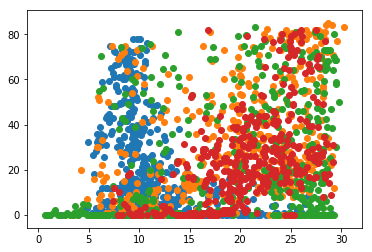

In [6]:
#Graficamos las primeras dos cracteristicas con sus respectivos clousters
n = 4
clustering = AgglomerativeClustering( n_clusters=n)
label =clustering.fit_predict(data) 
dataA =np.array(data)

for i in range (n):
    ii =label==i
    datatem=dataA[ii]
    plt.scatter(datatem[:,0], datatem[:,3])

In [2]:
# Carga datos
data = pd.read_csv('BreadBasket_DMS.csv')

hora =np.zeros(data.shape[0])
mes =np.zeros(data.shape[0])
anio =np.zeros(data.shape[0])
for i in range (data.shape[0]):
    hora[i]=np.array(data['Time'])[i].split(":")[0]
    mes[i]=np.array(data['Date'])[i].split("-")[1]
    anio[i]=np.array(data['Date'])[i].split("-")[0]
datos=np.zeros((data.shape[0],3))
datos[:,0]=(hora-np.mean(hora))/np.std(hora)
datos[:,1]=(mes-np.mean(mes))/np.std(mes)
datos[:,2]=(anio - np.mean(anio))/np.std(anio)

print(data)


             Date      Time  Transaction                  Item
0      2016-10-30  09:58:11            1                 Bread
1      2016-10-30  10:05:34            2          Scandinavian
2      2016-10-30  10:05:34            2          Scandinavian
3      2016-10-30  10:07:57            3         Hot chocolate
4      2016-10-30  10:07:57            3                   Jam
5      2016-10-30  10:07:57            3               Cookies
6      2016-10-30  10:08:41            4                Muffin
7      2016-10-30  10:13:03            5                Coffee
8      2016-10-30  10:13:03            5                Pastry
9      2016-10-30  10:13:03            5                 Bread
10     2016-10-30  10:16:55            6             Medialuna
11     2016-10-30  10:16:55            6                Pastry
12     2016-10-30  10:16:55            6                Muffin
13     2016-10-30  10:19:12            7             Medialuna
14     2016-10-30  10:19:12            7               

[[-0.08347791  0.70457692 -0.70470051]
 [-0.9965074  -0.06051884  0.05753675]]
-0.08347791338953839


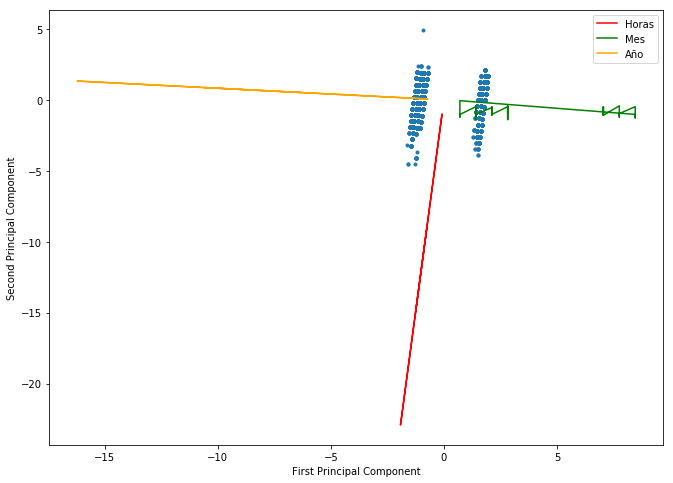

In [5]:
n=2
pca = PCA(n_components=n)
pca.fit(datos)
coef=pca.components_
variables = np.array(datos)
etiquetas= np.array(data['Item'])

print(coef)
componentes =np.zeros((variables.shape[0], n))
for i in range(coef.shape[0]):
    for j in range(coef.shape[1]):
        componentes[:,i]+=coef[i,j]*variables[:,j]
        
plt.figure(figsize = (11, 8))

plt.scatter(componentes[:,0], componentes[:,1], marker=".")
plt.ylabel('Second Principal Component')
plt.xlabel('First Principal Component')

hora1=coef[0,0]*hora
hora2=coef[1,0]*hora
mes1=coef[0,1]*mes
mes2=coef[1,1]*hora
anio1=coef[0,2]*hora
anio2=coef[1,2]*hora

print(coef[0,0])
plt.plot(hora1,hora2, c='r', label='Horas')
plt.plot(mes1,mes2, c='g', label='Mes')
plt.plot(anio1,anio2, c='orange', label = 'Año')
plt.legend()


# Etiquetar los puntos
#for i in range(etiquetas.size):
 #   plt.annotate(etiquetas[i] , (componentes[i,0],componentes[i,1]))

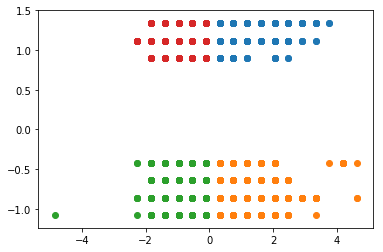

In [4]:
#Graficamos las primeras dos cracteristicas con sus respectivos clousters
n = 4
clustering = KMeans( n_clusters=n)
label =clustering.fit_predict(datos) 
dataA =np.array(datos)

for i in range (n):
    ii =label==i
    datatem=dataA[ii]
    plt.scatter(datatem[:,0], datatem[:,1])